# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
    <li><a href="#data-gathering">Data Gathering</a></li>
    <li><a href="#assessing-data">Assessing Data</a></li>
    <li><a href="#cleaning-data">Cleaning Data</a></li>
    <li><a href="#storing-data">Storing Data</a></li>
    <li><a href="#analyzing-data">Analyzing and Visualizing Data</a></li>
</ul>

In [1]:
# importer les bibliothèques nécéssaire pour le projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

<a id="data-gathering"></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# importer le premier dataset
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
def download_prediction():
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    response = requests.get(url)
    name = "image-predictions.tsv"
    with open("./"+name, mode='wb') as file:
        file.write(response.content)
        print(f"Fichier {name} telechargé")
        
# Telecharger le dataset
download_prediction()
# Importer les données de prédiction 
image_prediction = pd.read_csv("image-predictions.tsv",sep="\t")

Fichier image-predictions.tsv telechargé


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:

# Telecharger les données via l'API Twitter

# CLE et Jeton
# consumer_key = 'MON KEY'
# consumer_secret = 'MON KEY'
# access_token = 'TWITTER KEY'
# access_secret = 'PASS'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = twitter_archive.tweet_id.values
# len(tweet_ids)

# count = 0
# fails_dict = {}
# start = timer()
# with open('tweet_json.txt', 'w') as outfile:
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


# Importer les données JSON
twitter_json = pd.read_json("tweet_json.txt", lines=True)


<a id="assessing-data"></a>
## Assessing Data

In [5]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> - Certains champs possède des valeurs null
> - La colonne timestamp n'est pas uniforme
> - On a plus besoin de la colonne **text**

In [6]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
twitter_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> - Les retweets doivent être supprimer du dataset

In [9]:
# Afficher les valeurs possible des étapes de chien dans le dataset twitter_archive 
for etape in ["doggo","floofer","pupper","puppo"]:
    print(etape)
    print(twitter_archive[etape].unique())
    print("\n\n")

doggo
['None' 'doggo']



floofer
['None' 'floofer']



pupper
['None' 'pupper']



puppo
['None' 'puppo']





> - Les valeurs null doivent être uniformisés à NaN
> - Les étapes doivent-etre sur les lignes et non les colonnes

In [10]:
# Descrire les valeurs numérique
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> - On constate des valeurs abérante dans **raiting_numerator**
> - Il doit y avoir des erreurs de saisi dans **rating_denominator** (different de 10)

<AxesSubplot:>

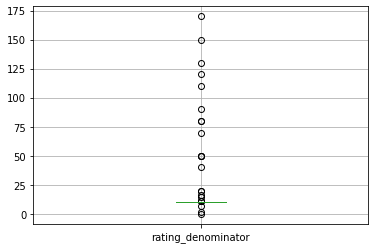

In [11]:
# Voir à l'aide d'une graphique les valeurs qui ne correspond pas dans le dataset
twitter_archive.boxplot(["rating_denominator"])

In [12]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

> - Les valeurs de rating_denominator autres que 10 sont fausses

<AxesSubplot:>

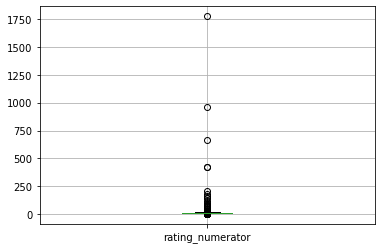

In [13]:
twitter_archive.boxplot(["rating_numerator"])

In [14]:
# Voir le nombre de chaque rating
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [15]:
# Voir le nombre de rating suppérieurà 20
twitter_archive[twitter_archive.rating_numerator>20].rating_numerator.value_counts()

420     2
75      2
99      1
144     1
26      1
121     1
143     1
44      1
60      1
45      1
80      1
50      1
666     1
204     1
1776    1
165     1
27      1
24      1
84      1
960     1
182     1
88      1
Name: rating_numerator, dtype: int64

> - On considère que les rating_numerator superieur à 20 sont des erreurs de saisie

In [16]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> - **p1_dog**, **p2**, **p2_conf**, **p2_dog**, **p3**, **p3_conf**, **p3_dog** n'explique pas le contenu de la colonne

In [17]:
# Voir les doublons
sum(twitter_archive.duplicated())

0

In [18]:
sum(twitter_archive.tweet_id.duplicated())

0

In [19]:
sum(image_prediction.duplicated())

0

In [20]:
sum(image_prediction.tweet_id.duplicated())

0

In [21]:
sum(twitter_json.id.duplicated())

0

> - Aucune duplication de ligne

In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> - On doit verifier que un chien ne soit pas associé à plusieur race en même temps

In [23]:
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

> - On doit supprimer plusieurs colonne après avoir extrait les informations nécessaire

In [24]:
twitter_archive.timestamp.unique()

array(['2017-08-01 16:23:56 +0000', '2017-08-01 00:17:27 +0000',
       '2017-07-31 00:18:03 +0000', ..., '2015-11-15 23:21:54 +0000',
       '2015-11-15 23:05:30 +0000', '2015-11-15 22:32:08 +0000'],
      dtype=object)

In [25]:
sum(twitter_archive.timestamp > '2017-08-01')

2

> - Des données après le `01/08/2017` sont encore présentes dans les datasets

### Quality Issue

#### Visual
1. La colonne timestamp de `twitter_archive` n'est pas au bon format `DateTime` de Pandas.
2. Il y  a plusieurs colonne dont les données sont manquantes dans `twitter_archive` telles que **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**.**in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**,**retweeted_status_timestamp**.
3. La colonne `text` dans `twitter_archive` n'est plus nécéssaire puisque les notes ont déjà été extracté.
4. Le nom des colonnes **p1**, **p1_conf**,  **p1_dog**, **p2**, **p2_conf**, **p2_dog**, **p3**, **p3_conf**, **p3_dog** dans `image_prediction` n'exprime pas le contenu de la colonne en question.

#### Programmatic
5. Il existe encore des de retweet dans `twitter_archive`.
6. Des erreur de saisi dans `twitter_archive` sur la colonne **rating_denominator**, les valeurs doivent être changer en 10, puis dans les **rating_numerator**, certaines valeurs sont abérantes.
7. Plusieurs colonnes dans `twitter_json` ne contiennent presque aucune information, on peut les supprimer.
8. Les données après le 1er Août 2017 doivent-être supprimer.


### Tidiness issues

#### Programmatic
1. Les données vides dans les colonnes **doggo**, **floofer**, **pupper**, **puppo** de  `twitter_archive` n'est pas uniforme c'est **None** au lieu de **NaN**

2. Les colonnes **doggo**, **floofer**, **pupper**, **puppo** de  `twitter_archive`doivent-être des lignes au lieu de colonne

<a id="cleaning-data"></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [26]:
# Make copies of original pieces of data
twitter_archive_cp = twitter_archive.copy()
image_prediction_cp = image_prediction.copy()
twitter_json_cp = twitter_json.copy()

### Issue #1: Fusionner d'abord les datasets avant d'effectuer les nettoyages

#### Define:
Pour que l'on puisse manipuler une et une seule dataframe, nous allons d'abord fusionner les données

#### Code

In [27]:
df = twitter_archive.merge(image_prediction, on = "tweet_id")

In [28]:
df = df.merge(twitter_json, left_on="tweet_id", right_on = "id")

#### Test

In [29]:
df.shape

(2073, 59)

In [30]:
df.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   object             
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  rating_numerator        

### Issue #2: Avoir un unique date et la mettre au bon format

#### Define
Il y a 2 champs qui indique la date actuellement, on va en garder q'un seul puis la mettre au format DateTime et la renommer en tweet_date_time

#### Code

In [32]:
# Voir les valeurs des dates
df[["timestamp","created_at"]].head()

,timestamp,created_at
0,2017-08-01 16:23:56 +0000,2017-08-01 16:23:56+00:00
1,2017-08-01 00:17:27 +0000,2017-08-01 00:17:27+00:00
2,2017-07-31 00:18:03 +0000,2017-07-31 00:18:03+00:00
3,2017-07-30 15:58:51 +0000,2017-07-30 15:58:51+00:00
4,2017-07-29 16:00:24 +0000,2017-07-29 16:00:24+00:00


In [33]:
# Creer une nouvelle date bien formaté puis supprimer les anciennes
df["tweet_date_time"] = pd.to_datetime(df["timestamp"])
df.drop(columns=["timestamp","created_at"],inplace=True)
# Changer la position de la nouvelle date
# LA mettre en deuxième colonne
tweet_date_time = df.pop("tweet_date_time")
df.insert(1,"tweet_date_time",tweet_date_time)

#### Test

In [34]:
df.head()

,tweet_id,tweet_date_time,in_reply_to_status_id_x,in_reply_to_user_id_x,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,2017-08-01 16:23:56+00:00,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Issue #3: Supprimer les données inutiles (les retweets)

#### Define:
On supprime les lignes dont **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp** ne sont pas nulle. Ce sont des `retweet`.

#### Code

In [35]:
retweets = df[df["retweeted_status_id"].isnull() == False][["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"]]
retweets

,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
32,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000
67,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000
81,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000
109,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000
129,8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000
...,...,...,...
757,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000
775,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000
1035,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000
1977,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000


In [36]:
df.shape

(2073, 58)

In [37]:
df.drop(labels = retweets.index,inplace=True)

#### Test

In [38]:
df.shape

(1994, 58)

### Issue #4: Supprimer tous les colonnes inutiles

#### Define:
Definir les colonnes inutiles qui ne comportent plus d'informations nécéssaire et les supprimer.

#### Code

In [39]:
# Revoir tous les colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1994 non-null   int64              
 1   tweet_date_time                1994 non-null   datetime64[ns, UTC]
 2   in_reply_to_status_id_x        23 non-null     float64            
 3   in_reply_to_user_id_x          23 non-null     float64            
 4   source_x                       1994 non-null   object             
 5   text                           1994 non-null   object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  1994 non-null   object             
 10  rating_numerator        

In [40]:
# Voir une aperçu des autres colonnes encore incompréhensible
df[["lang","full_text","truncated","display_text_range","entities","extended_entities","source_y"]].head()

,lang,full_text,truncated,display_text_range,entities,extended_entities,source_y
0,en,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r..."
1,en,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r..."
2,en,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r..."
3,en,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r..."
4,en,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r..."


In [41]:
to_delete = ["in_reply_to_status_id_x","in_reply_to_user_id_x","text","retweeted_status_id",
             "retweeted_status_user_id","retweeted_status_timestamp","expanded_urls","jpg_url",
             "user","geo","coordinates","contributors","retweeted_status","quoted_status_id",
             "quoted_status_id_str","quoted_status","in_reply_to_status_id_y","in_reply_to_status_id_str",
             "in_reply_to_user_id_y","in_reply_to_user_id_str","in_reply_to_screen_name",
             "place","id","id_str","favorited","retweeted","rating_denominator","full_text"]
df.drop(columns=to_delete,inplace=True)

#### Test

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1994 non-null   int64              
 1   tweet_date_time                1994 non-null   datetime64[ns, UTC]
 2   source_x                       1994 non-null   object             
 3   rating_numerator               1994 non-null   int64              
 4   name                           1994 non-null   object             
 5   doggo                          1994 non-null   object             
 6   floofer                        1994 non-null   object             
 7   pupper                         1994 non-null   object             
 8   puppo                          1994 non-null   object             
 9   img_num                        1994 non-null   int64              
 10  p1                      

### Issue #5: Le nom des colonnes doivent-être expressif

#### Define:
Renommer les colonnes:
> - p1 ---> prediction_1
> - p1_conf ---> prediction_confiance_1
> - p2 ---> prediction_2
> - p2_conf ---> prediction_confiance_2
> - p3 ---> prediction_3
> - p3_conf ---> prediction_confiance_3

#### Code

In [43]:
df.rename(columns={"p1": "prediction_1","p2": "prediction_2","p3": "prediction_3"},inplace=True)
df.rename(columns={"p1_conf": "prediction_confiance_1","p2_conf": "prediction_confiance_2","p3_conf": "prediction_confiance_3"},inplace=True)

#### Test

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1994 non-null   int64              
 1   tweet_date_time                1994 non-null   datetime64[ns, UTC]
 2   source_x                       1994 non-null   object             
 3   rating_numerator               1994 non-null   int64              
 4   name                           1994 non-null   object             
 5   doggo                          1994 non-null   object             
 6   floofer                        1994 non-null   object             
 7   pupper                         1994 non-null   object             
 8   puppo                          1994 non-null   object             
 9   img_num                        1994 non-null   int64              
 10  prediction_1            

### Issue #6: Uniformiser les données nulle puis pivoter ceux qui voivent-être changer en lignes

#### Define:
Changer en 0 les valeurs None des colonnes **doggo**, **floofer**, **pupper**, **puppo**, et 0 sinon.
Puis on creer une nouvelle colonne nommé `etape` qui prend comme valeur **doggo**, **floofer**, **pupper** ou **puppo**.
On verifie qu'il n'y a pas de chient qui possède deux étapes différentes.

#### Code

In [45]:
for etape in ["doggo","floofer","pupper","puppo"]:
    print(df[etape].value_counts())

None     1920
doggo      74
Name: doggo, dtype: int64
None       1986
floofer       8
Name: floofer, dtype: int64
None      1782
pupper     212
Name: pupper, dtype: int64
None     1971
puppo      23
Name: puppo, dtype: int64


In [46]:
for etape in ["doggo","floofer","pupper","puppo"]:
    df.loc[df[etape] == "None",etape] = 0
    df.loc[df[etape] == etape,etape] = 1
    
# Test de changement de valeurs
for etape in ["doggo","floofer","pupper","puppo"]:
    print(df[etape].value_counts())
    
# Suppression des erreurs de saisie
errors = df[(df["doggo"] + df["floofer"]+df["pupper"]+df["puppo"]) > 1]
df.drop(labels = errors.index,inplace=True)
# Test Nombre de ligne contenant des erreurs doit être 0
errors = df[(df["doggo"] + df["floofer"]+df["pupper"]+df["puppo"]) > 1]
print(f"\n\nNombre d'erreur {errors.shape[0]}")


0    1920
1      74
Name: doggo, dtype: int64
0    1986
1       8
Name: floofer, dtype: int64
0    1782
1     212
Name: pupper, dtype: int64
0    1971
1      23
Name: puppo, dtype: int64


Nombre d'erreur 0


In [47]:
# Pivoter les colonnes en ligne
for etape in ["doggo","floofer","pupper","puppo"]:
    df.loc[df[etape] == 1,"etape"] = etape
df.loc[(df["doggo"] + df["floofer"]+df["pupper"]+df["puppo"]) == 0,"etape"] = np.nan

In [48]:
# Supprimer les colonnes non utils
df.drop(columns=["doggo","floofer","pupper","puppo"],inplace=True)

#### Test

In [49]:
# Les valeurs de étapes
df.etape.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1983 non-null   int64              
 1   tweet_date_time                1983 non-null   datetime64[ns, UTC]
 2   source_x                       1983 non-null   object             
 3   rating_numerator               1983 non-null   int64              
 4   name                           1983 non-null   object             
 5   img_num                        1983 non-null   int64              
 6   prediction_1                   1983 non-null   object             
 7   prediction_confiance_1         1983 non-null   float64            
 8   p1_dog                         1983 non-null   bool               
 9   prediction_2                   1983 non-null   object             
 10  prediction_confiance_2  

### Issue #7: Suppression des valeurs abérantes dans rating_numerator

#### Define:
On supprime les lignes dont les valeurs de la colonne **rating_numerator** est supérieur à 20

#### Code

In [51]:
df.shape

(1983, 27)

In [52]:
df[df.rating_numerator>20].rating_numerator.value_counts()

84      1
45      1
88      1
144     1
26      1
121     1
143     1
44      1
60      1
80      1
24      1
99      1
50      1
204     1
1776    1
165     1
27      1
75      1
420     1
Name: rating_numerator, dtype: int64

In [53]:
df.drop(labels=df[df.rating_numerator>20].index,inplace=True)

#### Test

In [54]:
df.shape

(1964, 27)

### Issue #8: Supprimer les données avant le **01/08/2017**

#### Define:
Chaque ligne dont la **tweet_date_time** est inférieur à **2017-08-01** sera supprimée.

#### Code

In [55]:
df.shape

(1964, 27)

In [56]:
# Sauvegarder l'index des éléments à supprimer dans une variable
to_delete_index = df[df.tweet_date_time > '2017-08-01'].index
df.loc[to_delete_index]

,tweet_id,tweet_date_time,source_x,rating_numerator,name,img_num,prediction_1,prediction_confiance_1,p1_dog,prediction_2,...,entities,extended_entities,source_y,is_quote_status,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,lang,etape
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13,Phineas,1,orange,0.097049,False,bagel,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",False,8853,39467,0.0,0.0,en,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13,Tilly,1,Chihuahua,0.323581,True,Pekinese,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",False,6514,33819,0.0,0.0,en,NaN


#### Test

In [57]:
# Les données après le premier Août semble ne pas exister
to_delete_index = df[df.tweet_date_time >= '2017-08-02'].index
df.loc[to_delete_index]

,tweet_id,tweet_date_time,source_x,rating_numerator,name,img_num,prediction_1,prediction_confiance_1,p1_dog,prediction_2,...,entities,extended_entities,source_y,is_quote_status,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,lang,etape


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1964 non-null   int64              
 1   tweet_date_time                1964 non-null   datetime64[ns, UTC]
 2   source_x                       1964 non-null   object             
 3   rating_numerator               1964 non-null   int64              
 4   name                           1964 non-null   object             
 5   img_num                        1964 non-null   int64              
 6   prediction_1                   1964 non-null   object             
 7   prediction_confiance_1         1964 non-null   float64            
 8   p1_dog                         1964 non-null   bool               
 9   prediction_2                   1964 non-null   object             
 10  prediction_confiance_2  

### Issue #9: Arranger la colonne une dernière fois

#### Define:
Mettre le **favorite_count**, **retweet_count** et le **rating_numerator** en dernière colonne

#### Code

In [59]:
favorite_count = df.pop("favorite_count")
retweet_count = df.pop("retweet_count")
rating_numerator = df.pop("rating_numerator")
df.insert(df.shape[1],"favorite_count",favorite_count)
df.insert(df.shape[1],"retweet_count",retweet_count)
df.insert(df.shape[1],"rating_numerator",rating_numerator)

#### Test

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1964 non-null   int64              
 1   tweet_date_time                1964 non-null   datetime64[ns, UTC]
 2   source_x                       1964 non-null   object             
 3   name                           1964 non-null   object             
 4   img_num                        1964 non-null   int64              
 5   prediction_1                   1964 non-null   object             
 6   prediction_confiance_1         1964 non-null   float64            
 7   p1_dog                         1964 non-null   bool               
 8   prediction_2                   1964 non-null   object             
 9   prediction_confiance_2         1964 non-null   float64            
 10  p2_dog                  

<a id="storing-data"></a>
## Storing Data


In [61]:
# Reinitialiser les indexes
df.reset_index()
# Stockage des données néttoyées
df.to_csv("twitter_archive_master.csv")

<a id="analyzing-data"></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [62]:
df.head()

,tweet_id,tweet_date_time,source_x,name,img_num,prediction_1,prediction_confiance_1,p1_dog,prediction_2,prediction_confiance_2,...,extended_entities,source_y,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,lang,etape,favorite_count,retweet_count,rating_numerator
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Phineas,1,orange,0.097049,False,bagel,0.085851,...,"{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",False,0.0,0.0,en,NaN,39467,8853,13
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Tilly,1,Chihuahua,0.323581,True,Pekinese,0.090647,...,"{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",False,0.0,0.0,en,NaN,33819,6514,13
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Archie,1,Chihuahua,0.716012,True,malamute,0.078253,...,"{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",False,0.0,0.0,en,NaN,25461,4328,12
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Darla,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,...,"{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",False,0.0,0.0,en,NaN,42908,8964,13
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Franklin,2,basset,0.555712,True,English_springer,0.225770,...,"{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",False,0.0,0.0,en,NaN,41048,9774,12


### Insights:
1. Quelles sont le nom des chiens les plus fréquents ?

2. Les photos des chiens qui ont une bonne note sont-ils retweeté et mis en favoris ?

3. Quelles sont les notes obtenues par ``étape`` 

### Visualization

#### 1. Le nom des chiens les plus fréquents ?

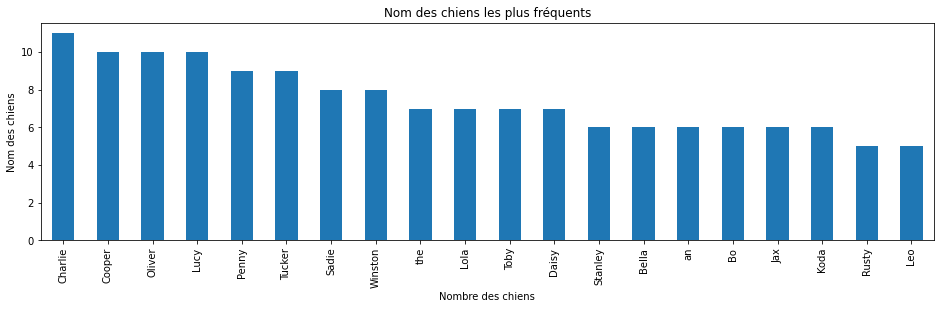

In [63]:
plt.figure(figsize=[16,4])
df[(df["name"] != 'None') & (df["name"] != 'a')  ].name.value_counts()[:20].plot.bar()
plt.title('Nom des chiens les plus fréquents')
plt.xlabel('Nombre des chiens');
plt.ylabel('Nom des chiens');

#### 2. Relation rating et retweet-favoris

In [64]:
df.describe()

,tweet_id,img_num,prediction_confiance_1,prediction_confiance_2,prediction_confiance_3,possibly_sensitive,possibly_sensitive_appealable,favorite_count,retweet_count,rating_numerator
count,1.964000e+03,1964.000000,1964.000000,1.964000e+03,1.964000e+03,1964.0,1964.0,1964.000000,1964.000000,1964.000000
mean,7.356492e+17,1.204684,0.592961,1.350639e-01,6.031546e-02,0.0,0.0,8889.340122,2760.799898,10.534623
std,6.763647e+16,0.563681,0.272011,1.008388e-01,5.082257e-02,0.0,0.0,12233.196699,4679.780478,2.200200
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,0.0,0.0,81.000000,16.000000,0.000000
25%,6.757100e+17,1.000000,0.360361,5.433222e-02,1.619707e-02,0.0,0.0,1944.000000,620.000000,10.000000
50%,7.080678e+17,1.000000,0.587357,1.187100e-01,4.959335e-02,0.0,0.0,4086.000000,1343.500000,11.000000
75%,7.877408e+17,1.000000,0.842330,1.956673e-01,9.162278e-02,0.0,0.0,11339.750000,3221.000000,12.000000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.710420e-01,0.0,0.0,132810.000000,79515.000000,14.000000


> - Les chiens les mieux notés obtiennent une note superieur à 12 
> - Le nombre de mis en favoris moyen est de 8889
> - Le nombre de retweet moyen est de 2760

In [65]:
chien_mieu_note = df[df.rating_numerator>12]
chien_non_mieu_note = df[df.rating_numerator<=12]

In [66]:
chien_mieu_note.describe()

,tweet_id,img_num,prediction_confiance_1,prediction_confiance_2,prediction_confiance_3,possibly_sensitive,possibly_sensitive_appealable,favorite_count,retweet_count,rating_numerator
count,2.940000e+02,294.000000,294.000000,294.000000,2.940000e+02,294.0,294.0,294.000000,294.000000,294.000000
mean,8.159238e+17,1.445578,0.620727,0.133589,5.813191e-02,0.0,0.0,23367.860544,7212.108844,13.119048
std,6.171284e+16,0.867756,0.267051,0.099866,5.126639e-02,0.0,0.0,19987.236491,8986.674584,0.324397
min,6.682563e+17,1.000000,0.063152,0.000370,5.595040e-07,0.0,0.0,610.000000,127.000000,13.000000
25%,7.852103e+17,1.000000,0.388840,0.050148,1.525677e-02,0.0,0.0,10881.250000,2588.750000,13.000000
50%,8.297359e+17,1.000000,0.646178,0.116532,4.408730e-02,0.0,0.0,19173.000000,4493.000000,13.000000
75%,8.641249e+17,1.750000,0.869287,0.190816,9.406613e-02,0.0,0.0,30260.000000,8045.750000,13.000000
max,8.924206e+17,4.000000,0.999281,0.451038,2.130110e-01,0.0,0.0,132810.000000,79515.000000,14.000000


In [67]:
chien_non_mieu_note.describe()

,tweet_id,img_num,prediction_confiance_1,prediction_confiance_2,prediction_confiance_3,possibly_sensitive,possibly_sensitive_appealable,favorite_count,retweet_count,rating_numerator
count,1.670000e+03,1670.000000,1670.000000,1.670000e+03,1.670000e+03,1670.0,1670.0,1670.000000,1670.000000,1670.000000
mean,7.215171e+17,1.162275,0.588073,1.353236e-01,6.069986e-02,0.0,0.0,6340.426946,1977.156287,10.079641
std,5.811175e+16,0.479054,0.272661,1.010366e-01,5.074977e-02,0.0,0.0,7902.727667,2734.146096,2.071578
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,0.0,0.0,81.000000,16.000000,0.000000
25%,6.741259e+17,1.000000,0.355144,5.487460e-02,1.646300e-02,0.0,0.0,1597.250000,558.000000,10.000000
50%,6.976066e+17,1.000000,0.585010,1.193165e-01,5.180435e-02,0.0,0.0,3442.000000,1131.500000,11.000000
75%,7.576078e+17,1.000000,0.836617,1.966102e-01,9.143888e-02,0.0,0.0,8099.500000,2326.000000,12.000000
max,8.918152e+17,4.000000,1.000000,4.880140e-01,2.710420e-01,0.0,0.0,75193.000000,33421.000000,12.000000


Text(0, 0.5, 'Nombre')

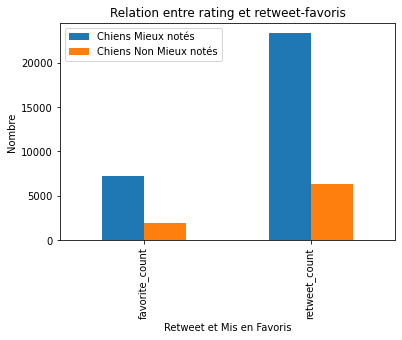

In [68]:
plotdata = pd.DataFrame({
    "Chiens Mieux notés":[chien_mieu_note.describe().retweet_count[1],chien_mieu_note.describe().favorite_count[1]],
    "Chiens Non Mieux notés":[chien_non_mieu_note.describe().retweet_count[1],chien_non_mieu_note.describe().favorite_count[1]],
    }, 
    index=["favorite_count", "retweet_count"]
)

plotdata.plot(kind="bar")
plt.title("Relation entre rating et retweet-favoris")
plt.xlabel("Retweet et Mis en Favoris")
plt.ylabel("Nombre")

#### 3. Note obtenue par étape

In [69]:
data = (df.groupby("etape")["rating_numerator"].sum()/df.groupby("etape")["rating_numerator"].count())

Text(0.5, 1.0, 'Pourcentage des notes obtenue par étape tout en tenant compte le nombre des chiens par étape')

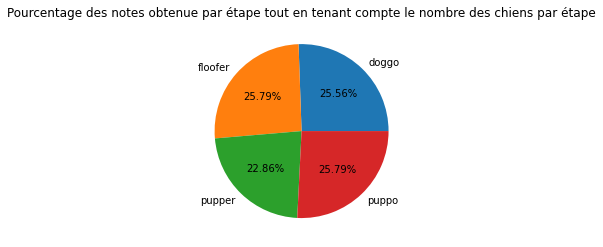

In [70]:
plt.pie(data,labels=data.index,autopct='%1.2f%%')
plt.title('Pourcentage des notes obtenue par étape tout en tenant compte le nombre des chiens par étape')